## **Demographic Trends and Figures for ICE arrests (2011-2025**
We unfortunately do not have data for 2013, but we can still observe trends over the four presidential administrations (and five terms in office) that span this dataset: 
- Obama Administration (Oct 2011-2017, including the tail of his first term & all of his second)
- First Trump Administration (2017-2020)
- Biden Administration (2020-2024)
- Current Trump Administration (2024-Oct 2025)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings, datetime

input_path = "/home/betel/Desktop/Spring '26/Notes/ICE/"
input_name = "Arrests 2011-2025.csv"

#catch warnings on the read because some columns are mixed type (include null values)
with warnings.catch_warnings(): 
    warnings.simplefilter("ignore")
    arrests = pd.read_csv(input_path + input_name).drop(columns="Unnamed: 0")
    
    #minor normalization -> datetime objects get saved as strings, so this re-converts
    arrests["Apprehension Date Time"] = pd.to_datetime(arrests["Apprehension Date Time"], format='ISO8601')
    
    #aggregated arrests variable by month, as this analysis is frequency-centric
    aggregated_arrests = arrests.groupby(pd.Grouper(key="Apprehension Date Time", freq="1M"))

In [27]:
#helper func to format our graphs from here on out. Displays presedential inaugurations
def plot_administrations(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y')

    # these vertical lines show the change in administrations
    plt.axvline(x = 564.645, color = 'r', label = 'Trump inaugurated', ls = "--")
    plt.axvline(x = 612.645, color = 'k', label = 'Biden inaugurated', ls = ":")
    plt.axvline(x = 660.625, color = 'r', ls = "--")

    # legend is made smaller so graph is more readable
    plt.legend(fontsize = "small", framealpha = 0.6)

# Figures

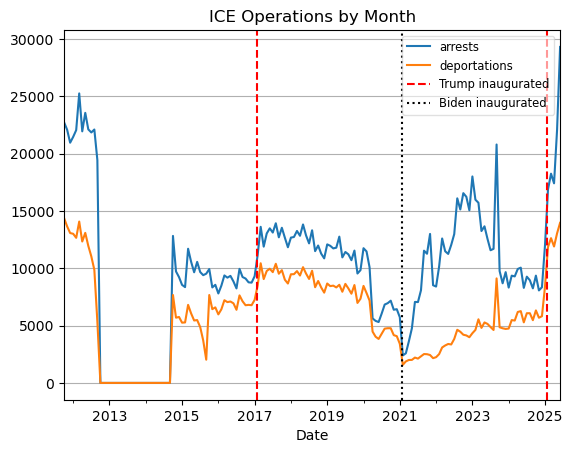

In [28]:
#quick & easy variables
arrests_agg = aggregated_arrests.size()
deportations_agg = aggregated_arrests["Deported"].sum()

#combine series, drop last month due to incomplete data
arrests_monthly = pd.concat([arrests_agg, deportations_agg], axis=1)[:-1]
arrests_monthly.columns = ["arrests", "deportations"]

# plots count of arrests per week in a line plot
arrests_monthly.plot()
plot_administrations('Date', '', 'ICE Operations by Month')

In [32]:
arrests_pre_2023 = arrests.copy()

Citizenship Country
MEXICO         843044
GUATEMALA      163002
HONDURAS       150586
EL SALVADOR     91120
VENEZUELA       55589
Name: count, dtype: int64

### Citizenship Country
Early on in going through the data, we noticed that the majority of people arrested were citizens of Mexico. This is expected, due to the geographic & socioeconomic position of Mexico to the USA. Variance between administrations may reflect differently in minor on foreign policy relating to immigration & trade, as well more majorly as on domestic policy relating to racial profiling.

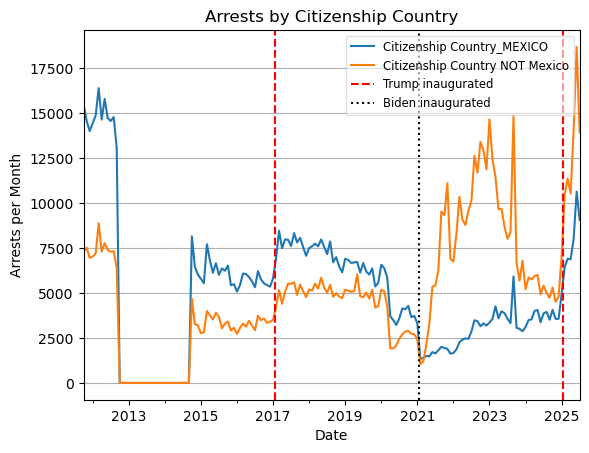

In [35]:
# separates out arrests by citizenship country and takes out any data that does not have a value for citizenship country
arr_country_dummies = pd.get_dummies(arrests[arrests["Citizenship Country"].notna()], columns = ["Citizenship Country"])

# creates a column containing all arrests of people who were not from Mexico
arr_country_dummies["Citizenship Country NOT Mexico"] = ~arr_country_dummies["Citizenship Country_MEXICO"]

# groups data by month so that the graph is readable
arr_country_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1M"))[["Citizenship Country_MEXICO", "Citizenship Country NOT Mexico"]].sum().plot()

#formatting
plot_administrations('Date', 'Arrests per Month', 'Arrests by Citizenship Country')
plt.show()

Alt text: Line graph with the title "Arrests per month by citizenship country (Oct 2011 to July 2025)". The y-axis is arrests (per month) and it ranges from 0 to about 20000. The x-axis is date and it ranges from just before 2012 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per month data of Mexican citizens and an orange line containing the arrests per month data of non-Mexican citizens. In the period before the first Trump inauguration, the Mexican citizen arrests (per month) begins at around 15000 until October 2012. The non-Mexican citizen arrests are about 7500 during this period. Then there is no arrests data until October 2014. From October 2014 till the first Trump inauguration, the Mexican citizen arrests per month quantity hovers around 6000 and the non-Mexican citizen arrests hover around 3000 per month. After the first Trump inauguration, the Mexican citizen arrests per month increase to around 7500 and slowly declines to about 6000 until 2020, when they sharply decline to about 3000 until Biden's administration. During this time, the non-Mexican citizen arrests hover around 5000 per month until 2020, when they decline to 2500 until Biden's administration. Here, the curves dramatically diverge. During Biden's term the Mexican citizen arrests start at about 1200 per month and slowly increase to about 3000 per month. The non-Mexican citizen arrests increase to about 15000 in 2023 and decrease back to 5000 at the end of Biden's term. At the start of Trump's second term, the non-Mexican citizen arrests sharply increase to about 11000 and then 18000 arrests per month. The Mexican citizen arrests increase from about 5000 to 10000 arrests per month.

**This isn't as obvious as the arrests data.** Most of the data appears to be roughly following the general trend of the arrests data. The most surprising thing is during Biden's term when the Mexican citizen arrest data does not peak in the same way as the rest of the data. Despite this graph, we still know that after 2020, Mexican citizens were still a majority of the ICE arrests. This peak of non-Mexican arrests might be a reflection of policy changes during the Biden administration

In [12]:
arrests_pre_2023[arrests_pre_2023["Apprehension Year"] >= 2021]["Citizenship Country"].value_counts()

Citizenship Country
MEXICO              195500
HONDURAS             68153
GUATEMALA            61826
VENEZUELA            53381
NICARAGUA            50062
                     ...  
BRUNEI                   1
FRENCH POLYNESIA         1
ANGUILLA                 1
EAST TIMOR               1
SINT EUSTATIUS           1
Name: count, Length: 209, dtype: int64

### State
Next, we wanted to investigate the arrests throughout the states. Texas unsurprisingly comes out on top with 220,000 arrests, but there are almost three times as many arrests from Texas, than from the next highest state, California with 78,168 arrests. It is important to note here that state data only started being collected in October of 2015, so this does not include data collected prior to then.

In [13]:
arrests_pre_2023["Apprehension State"].describe()

count     901580
unique        62
top        TEXAS
freq      221651
Name: Apprehension State, dtype: object

First we looked at the arrests per month in Texas and not in Texas.

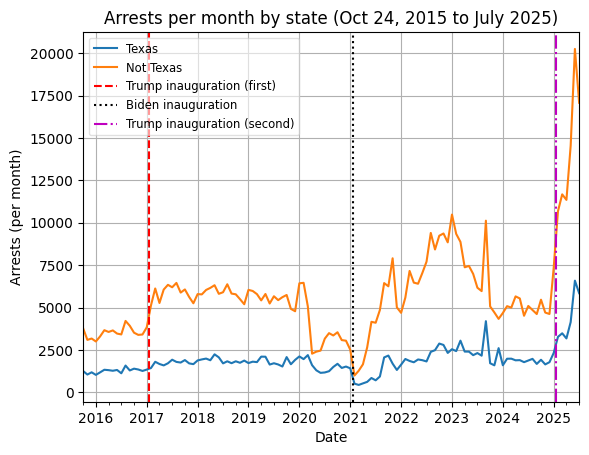

In [14]:
# separates out arrests by apperehension state and takes out any data that does not have a value for apprehension state
arr_state_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Apprehension State"].notna()], columns = ["Apprehension State"])

# creates a column containing all arrests of people who were not from Texas
arr_state_dummies["Apprehension State NOT Texas"] = ~arr_state_dummies["Apprehension State_TEXAS"]

# groups data by month so that the graph is readable
arr_state_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "ME"))[["Apprehension State_TEXAS", "Apprehension State NOT Texas"]].sum().plot()

plt.xlabel('Date')
plt.ylabel('Arrests (per month)')
plt.title('Arrests per month by state (Oct 24, 2015 to July 2025)')
plt.grid(True)

# these vertical lines show the change in administrations
plt.axvline(x = 564.645, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 612.645, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 660.625, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")

# legend is made smaller so graph is more readable + added labels for all lines
plt.legend(["Texas", "Not Texas", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per month by state (Oct 24, 2015 to July 2025)". The y-axis is arrests (per month) and it ranges from 0 to about 20000. The x-axis is date and it ranges from just before 2016 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per month data in Texas and an orange line containing the arrests per month data not in Texas. In the period before the first Trump inauguration, the Texas arrests (per month) begins at around 1250 and slowly increases until the first Trump administration. The non-Texas arrests are about 3000 during this period. After the first Trump inauguration, the Texas arrests per month stay around 2200 per month. During this time, the non-Texas arrests hover around 5500 per month until 2020, when they decline to 2500 until Biden's administration. Here, the curves diverge. During Biden's term the Texas arrests start at about 500 per month and slowly increase to about 2200 per month (with a small peak in 2023). The non-Texas arrests increase to about 10000 in 2023 and decrease back to 5000 at the end of Biden's term. At the start of Trump's second term, the non-Texas arrests sharply increase to about 11000 and then 20000 arrests per month. The Texas arrests increase from about 2500 to 6250 arrests per month.

**This appears to just be a reflection of the arrests data.** There do not appear to be any strange results here. Texas arrests do not decrease much during the height of COVID, which is likely due to the minimal lockdown policies in Texas at the time. It is interesting to see how much of the data is just from Texas, though.

We then wondered what the top five states (Texas, California, Florida, New York, and Georgia) look like here.

In [15]:
arrests_pre_2023[arrests_pre_2023["Apprehension State"].notna()]["Apprehension State"].value_counts()[: 5]

Apprehension State
TEXAS         221651
CALIFORNIA     78168
FLORIDA        64424
NEW YORK       50289
GEORGIA        46856
Name: count, dtype: int64

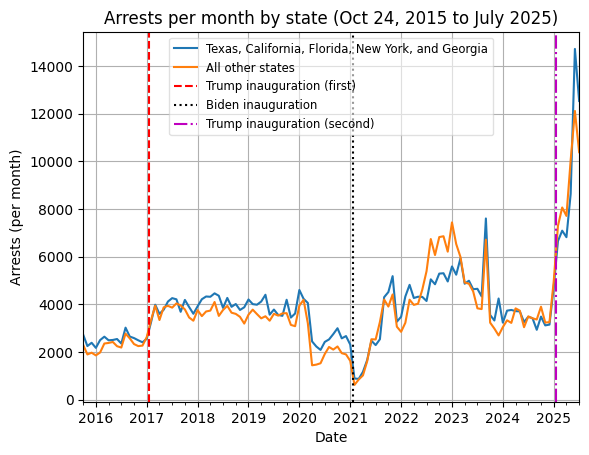

In [16]:
# creates a column containing all arrests of people who were not from Texas, California, Florida, New York, and Georgia
arr_state_dummies["Apprehension State Top Five"] = arr_state_dummies["Apprehension State_TEXAS"] + arr_state_dummies["Apprehension State_CALIFORNIA"] + arr_state_dummies["Apprehension State_FLORIDA"] + arr_state_dummies["Apprehension State_NEW YORK"] + arr_state_dummies["Apprehension State_GEORGIA"]
arr_state_dummies["Apprehension State NOT Top Five"] = ~arr_state_dummies["Apprehension State Top Five"]

# groups data by month so that the graph is readable
arr_state_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "ME"))[["Apprehension State Top Five", "Apprehension State NOT Top Five"]].sum().plot()

plt.xlabel('Date')
plt.ylabel('Arrests (per month)')
plt.title('Arrests per month by state (Oct 24, 2015 to July 2025)')
plt.grid(True)

# these vertical lines show the change in administrations
plt.axvline(x = 564.645, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 612.645, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 660.625, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")

# legend is made smaller so graph is more readable + added labels for all lines
plt.legend(["Texas, California, Florida, New York, and Georgia", 
            "All other states", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)

plt.show()

Alt text: Line graph with the title "Arrests per month by state (Oct 24, 2015 to July 2025)". The y-axis is arrests (per month) and it ranges from 0 to about 15000. The x-axis is date and it ranges from just before 2016 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per month data in Texas, California, Florida, New York, and Georgia and an orange line containing the arrests per month data not in these states. Both of these lines are essentially at the same values for the whole graph, so they will be described at the same time. In the period before the first Trump inauguration, the arrests (per month) hovers at around 2500 per month until the first Trump administration. Then, the arrests per month stay around 4000 per month until they sharply decrease in 2020 to around 2000 per month. During the Biden administration, the arrests go from aroung 1250 per month to a peak of 6000 in 2023 and then they decrease to 3500 at the end of his term. At the start of Trump's second term, the arrests sharply increase to about 7500 and then 13000 arrests per month.

This graph just shows that the combination of arrest data from the top five states (Texas, California, Florida, New York, and Georgia) is about equivalent to the arrest data from the entire rest of the dataset. There is not an administration correlation here.

### Gender
Now, on to gender! Due to the relatively small amount of data of "unknown" gender (1337 unknown vs. 226,969 women), it was not included in the graph. We wonder what the one entry of gender of "IIDS ETL NULL" means and what it means to have that as your gender.

In [17]:
arrests_pre_2023["Gender"].describe()

count     1695332
unique          4
top          Male
freq      1467025
Name: Gender, dtype: object

In [18]:
arrests_pre_2023["Gender"].unique()

array(['Male', 'Female', 'Unknown', 'IIDS ETL NULL'], dtype=object)

In [19]:
arrests_pre_2023["Gender"].value_counts()

Gender
Male             1467025
Female            226969
Unknown             1337
IIDS ETL NULL          1
Name: count, dtype: int64

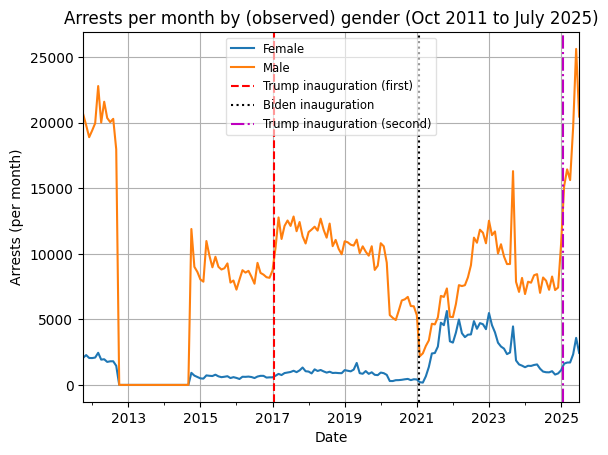

In [20]:
# separates out arrests by gender
arr_gender_dummies = pd.get_dummies(arrests_pre_2023, columns = ["Gender"])

# groups data by month so that the graph is readable
arr_gender_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "ME"))[["Gender_Female", "Gender_Male"]].sum().plot()

plt.xlabel('Date')
plt.ylabel('Arrests (per month)')
plt.title('Arrests per month by (observed) gender (Oct 2011 to July 2025)')
plt.grid(True)

# these vertical lines show the change in administrations
plt.axvline(x = 564.645, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 612.645, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 660.625, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")

# legend is made smaller so graph is more readable + added labels for all lines
plt.legend(["Female", "Male", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per month by (observed) gender (Oct 2011 to July 2025)". The y-axis is arrests (per month) and it ranges from 0 to about 25500. The x-axis is date and it ranges from just before 2012 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per month data in of people labeled as "Female" and an orange line containing the arrests per month data of those labeled "Male". From October 2011 till October 2012, the Male line hovers aroung 20200 arrests per month and the Female line hovers around 2000. Then from October 2012 to October 2014 there is no data. From October 2015 until the first Trump inauguration, the Male arrests (per month) hovers around 9000 and the Female arrests stay constant at around 700 per month. During the first Trump term, the Male arrests per month start around 11500 and slowly decrease to 10000 at the start of 2020. Then they sharply decline to 5000 until the begining of the Biden administration. During Trump's term, the Female arrests stay at about 1000 per month and then decrease down to 500 in 2020. During Biden's term the Male arrests start at about 2500 per month and peak at about 12000 per month at the start of 2023 and then decrease to about 7500 in 2024. The Female arrests also peak in Biden's term. They go from about 50 per month to 5000 per month at the start of 2023 and then they decrease to about 1000 per month at the end of his term. In Trump's second term, the Male arrests sharply increase to 12500 and then 25000 arrests per month and the Female arrests increase to 1500 and then peak at 3700 per month.

This graph appears to reflect the larger arrests data, although the overall trend is largely absent in the Female data (until Biden's term).

### Ethnicity
The ethnicity categories in the dataset are Hispanic and not Hispanic (and unknown). The vast majority of the dataset contains arrests of Hispanic people. That is unsurprising, but nonetheless concerning, since it is another glaring piece of evidence showing the institutionalized racism in our policing. This data started being reported in October 2015, but stopped being reported in October 2023 (which is also concerning).

In [21]:
arrests_pre_2023["Ethnicity"].describe()

count              836033
unique                  3
top       Hispanic Origin
freq               760145
Name: Ethnicity, dtype: object

In [22]:
arrests_pre_2023["Ethnicity"].unique()

array([nan, 'Hispanic Origin', 'Not of Hispanic Origin', 'Unknown'],
      dtype=object)

In [23]:
arrests_pre_2023["Ethnicity"].value_counts()

Ethnicity
Hispanic Origin           760145
Not of Hispanic Origin     60874
Unknown                    15014
Name: count, dtype: int64

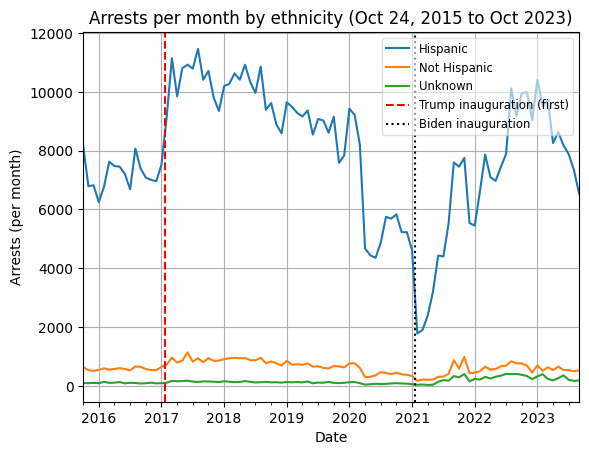

In [24]:
# separates out arrests by ethnicity and takes out any data that does not have a value for ethnicity
arr_ethnicity_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Ethnicity"].notna()], columns = ["Ethnicity"])

# groups data by month so that the graph is readable
arr_ethnicity_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "ME"))[["Ethnicity_Hispanic Origin", "Ethnicity_Not of Hispanic Origin", "Ethnicity_Unknown"]].sum().plot()

plt.xlabel('Date')
plt.ylabel('Arrests (per month)')
plt.title('Arrests per month by ethnicity (Oct 24, 2015 to Oct 2023)')
plt.grid(True)

# these vertical lines show the change in administrations
plt.axvline(x = 564.645, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 612.645, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 660.625, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")

# legend is made smaller so graph is more readable + added labels for all lines
plt.legend(["Hispanic", "Not Hispanic", "Unknown", "Trump inauguration (first)", "Biden inauguration"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per month by ethnicity (Oct 24, 2015 to Oct 2023)". The y-axis is arrests (per month) and it ranges from 0 to about 12000. The x-axis is date and it ranges from just before 2016 to towards the end of 2023. There are two vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, and a black dotted line labeled "Biden inauguration" located just after 2020. There are three horizontal lines: a blue line containing the arrests per month data of Hispanic people, an orange line containing the arrests per month data of non-Hispanic people, and a green line containing the arrests per month data of people with an unknown ethnicity. Over the whole dataset, the unknown line hovers just above 0 and has a rises in late 2021 to about 200 arrests per month. The non-Hispanic line hovers around 700-1000 arrests per month for most of the dataset with a peak of 1000 in late 2021. The Hispanic line is not constant over the graph. In the period before the first Trump inauguration, the Hispanic arrests hover around 7000-8000 per month. During Trump's first term, the Hispanic arrests start at around 11000 per month and slowly decrease until 2020 when they sharply decrease to about 5000 until Biden's administration. In Biden's term, the Hispanic arrests line starts at 2000 then increases to a peak of 7900 at the end of 2021 and then increases to a peak of 10000 at the start of 2023. Then the Hispanic arrests decrease to about 6500 per month.

This graph just once again shows how much of those arrested are Hispanic. This is indicative of profiling.

### Race
The race categories in the dataset are White, Black, Asian or Pacific Islander, American Indian or Alaskan Native, and Hispanic (and unknown). We did not include American Indian or Alaskan Native or Hispanic in our graph because of their low relative frequency. Just like the ethnicity data, this stopped being reported in October of 2023.

In [25]:
arrests_pre_2023["Race"].describe()

count     1016615
unique          6
top         White
freq       860123
Name: Race, dtype: object

In [26]:
arrests_pre_2023["Race"].unique()

array([nan, 'White', 'Unknown', 'Black', 'Asian or Pacific Islander',
       'American Indian or Alaskan Native', 'Hispanic'], dtype=object)

In [27]:
arrests_pre_2023["Race"].value_counts()

Race
White                                860123
Unknown                               97410
Black                                 43418
Asian or Pacific Islander             14956
American Indian or Alaskan Native       706
Hispanic                                  2
Name: count, dtype: int64

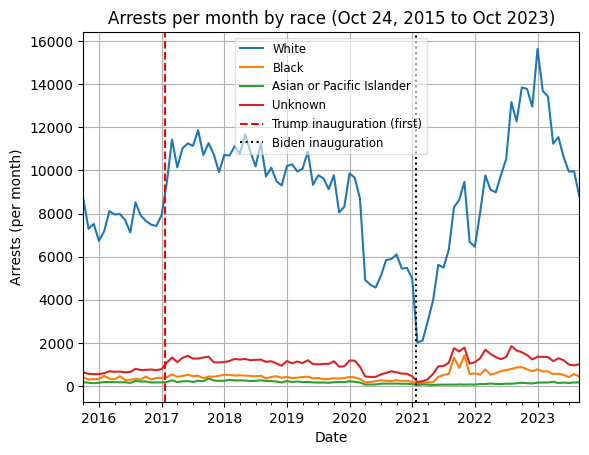

In [28]:
# separates out arrests by race
arr_race_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Race"].notna()], columns = ["Race"])

# groups data by month so that the graph is readable
arr_race_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "ME"))[["Race_White", "Race_Black", "Race_Asian or Pacific Islander", "Race_Unknown"]].sum().plot()

plt.xlabel('Date')
plt.ylabel('Arrests (per month)')
plt.title('Arrests per month by race (Oct 24, 2015 to Oct 2023)')
plt.grid(True)

# these vertical lines show the change in administrations
plt.axvline(x = 564.645, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 612.645, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 660.625, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")

# legend is made smaller so graph is more readable + added labels for all lines
plt.legend(["White", "Black", "Asian or Pacific Islander", "Unknown", 
            "Trump inauguration (first)", "Biden inauguration"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per month by race (Oct 24, 2015 to Oct 2023)". The y-axis is arrests (per month) and it ranges from 0 to about 16000. The x-axis is date and it ranges from just before 2016 to towards the end of 2023. There are two vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, and a black dotted line labeled "Biden inauguration" located just after 2020. There are four horizontal lines: a blue (this is the top line) line containing the arrests per month data of White people, an orange line containing the arrests per month data of Black people, a green line containing the arrests per month data of people Asian people or Pacific Islanders, and a red line indicating those with an unknown race. Over the whole dataset, the Asian or Pacific Islander line hovers just above 0. The Black arrests like also hovers just above 0 until late 2021 when it peaks at about 1000 arrests per month. Then it decreases to about 500 arrests by late 2023. The unknown line hovers around 700 arrests per month until the first Trump term, when it hovers around 1800 per month until early 2020 when it drops back down to about 500. Then it has a sharp peak of 1900 in late 2021 and then it slowly decreases to about 1100 at the end of 2023. The majority of the data is in the White line. Before the first Trump administraion, the White line hovers around 8000 arrests per month. After the Trump administration began, it decreased from 11000 down to 8000 in early 2020. Then it sharply decreased to about 5000 at the end of his term. In Biden's term, the White line rose from 2000 per month to a peak of 15000 at the start of 2023 and then decreased to 8500 by the end of 2023.

This appears to be a reflection of the Ethnicity graph rather than anything else.